# <a>Projeto Comparação entre resultados do Enem 2019 x Enem 2023</a>

Análise Exploratória dos Microdados do Exame Nacional do Ensino Médio (ENEM) de 2023, e comparação com os de 2019, utilizando os conceitos aprendidos na Jornada Cientista de Dados do Let's Data.

# <a>Motivação</a>

Todo trabalho de Ciência de Dados começa pela AED. Conhecer bem os dados, saber as distribuições, medidas estatísticas principais, visualizar correlações e evoluções é essencial para gerar insights e solucionar problemas.

Essa etapa é hibrída, ou seja, pode ser realizada sem um objetivo bem definido, apenas uma busca por informações e insights a partir dos dados. Por outro lado, um projeto com objetivos bem definidos (fase 1 do CRISP-DM) seria direcionado para as questões mais importantes do negócio.

# <a>Objetivo</a>

Vamos trabalhar com os microdados do Exame Nacional do Ensino Médio (ENEM) realizado em 2023. De acordo com o site do INEP, o ENEM tem o objetivo de avaliar o desempenho escolar dos estudantes ao término do Ensino Médio. As notas podem ser utilizadas para entrar em universidades brasileiras através do SISU ou ProUni, e também algumas instituições portuguesas.

Conhecer bem os dados dos aplicantes para a prova pode fornecer insights preciosos para a educação brasileira. Para o presente estudo vamos avaliar se dados demográficos, indicadores sociais, de escolaridade dos pais e outros tem correlações com as notas dos candidatos.

Vamos também comparar as características de 2023 com os de 2019.

In [1]:
# Importando as Bibliotecas necessárias:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
# Configurando o pandas para mostrar todas as linhas e colunas:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configurando o pandas para não mostrar a notação científica:

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Instalando o pyarrow para ler arquivos em parquet:

!pip install pyarrow

In [4]:
# Importando os microdados do Enem de 2019, que já estão em Parquet:

df_enem_2019 = pd.read_parquet('C:\data_science\projeto-enem\enem_2019.parquet')
df_enem_2019.shape

(5095270, 136)

In [5]:
# Vamos trabalhar com uma amostra de 10% dos microdados:

df_enem_2019 = df_enem_2019.sample(n=len(df_enem_2019)//10, random_state=42, replace=False)
df_enem_2019.shape

(509527, 136)

In [11]:
# Importando os microdados do Enem de 2023, e convertendo de CSV para Parquet:

df_enem_2023_csv = pd.read_csv('C:\data_science\projeto-enem\microdados_enem_2023.csv', encoding = 'latin1', delimiter=';')
df_enem_2023_csv.to_parquet('C:\data_science\projeto-enem\microdados_enem_2023.parquet')

In [6]:
# Importando os microdados do Enem 2023, agora em parquet:

df_enem_2023 = pd.read_parquet('C:\data_science\projeto-enem\microdados_enem_2023.parquet')
df_enem_2023.shape

(3933955, 76)

In [7]:
# Vamos trabalhar com uma amostra de 10% dos microdados:

df_enem_2023 = df_enem_2023.sample(n=len(df_enem_2023)//10, random_state=42, replace=False)
df_enem_2023.shape

(393395, 76)

In [8]:
# Vamos fazer a primeira visualização dos dados do Enem 2019:

df_enem_2019.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,190005708034,2019,2305506,Iguatu,23,CE,22.00,F,1,3,1,2305506.00,Iguatu,23.00,CE,1,3,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2305506,Iguatu,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,190003326900,2019,3548500,Santos,35,SP,19.00,F,1,1,1,3548500.00,Santos,35.00,SP,1,1,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3548500,Santos,35,SP,1,1,1,1,503.00,508.00,512.00,515.00,543.90,527.70,545.30,513.90,ACDDCEDEDCCBCBBBBAACECADABAEBBDEEACCECBBCBDDC,ACAABDBEEAABDCCAACBEEDCBDEDBBCCCBCEBDDCABCCBB,BBEEA99999DEEBECBBCACDEAABEEBBECEBAAEDCBECADCE...,EBBADECCAEBBCDECCAEBCABDBCDEBBADBDCABAEBDCCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,190004261548,2019,3552106,Socorro,35,SP,16.00,F,1,1,1,3552106.00,Socorro,35.00,SP,3,0,1,NaN,1,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552106,Socorro,35,SP,1,1,1,1,504.00,509.00,514.00,516.00,406.10,521.20,549.20,510.50,ADCAEDAEADACDCBACEDEABCEBBAEBABBACEEDEACAABCD,ADACCCACDBAABBBDBAEABCCEACAABDEBAECAEDAEDAACE,99999ABCABBAEBCDEDEBDAADCEDCDECBDBDBBECAEDCCBC...,BECACAABACBCABCACDACBDCCDACAAEBCECAECEBCAECEE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,190001849598,2019,3541000,Praia Grande,35,SP,22.00,M,1,1,1,3541000.00,Praia Grande,35.00,SP,1,5,1,1.00,0,NaN,NaN,None,N

In [9]:
# Vamos fazer a primeira visualização dos dados do Enem 2023:

df_enem_2023.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
553635,210059583535,2023,3,F,1,1,1,2,0,2,2.00,0,3303302.00,Niterói,33.00,RJ,2.00,1.00,1.00,3303302,Niterói,33,RJ,1,1,1,1,1221.00,1193.00,1204.00,1211.00,408.90,526.90,417.90,416.50,DDABBCCACBCCEDDBBBEBEBCDDCEACDCABBADDCACCDDCB,ACCBCABADAAAADEAECDABCACDBCACDBBADCCABCDEEBCD,BBCDACBCCDCADAAAEBBBDBDBEBBCCBBCCEDCBADBDDAED,CECCDEACDDCBDBCBCBBADDDDCEADCBBABBCDDAEBABCBA,0,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.00,120.00,200.00,100.00,140.00,160.00,720.00,C,C,B,B,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
3349365,210060187802,2023,2,F,1,1,1,3,0,1,NaN,1,NaN,None,NaN,None,NaN,NaN,NaN,3502804,Araçatuba,35,SP,1,1,1,1,1224.00,1192.00,1202.00,1214.00,499.40,535.60,549.20,570.70,ECADAEACBDBDABDDEBEBACBBDDECBBCDDBECBDEDCBCBA,DDAADEACCDBCBDCCEBEBCBDDAEDDCBECBCDBAEDDBEBCD,ABBCCEBEAEDDABBBACDBBAACACAEABBEEBBDBDCDADCAC,EABADDBECBCCAEBDEAAEDEAACDABCDCDBDEECDEABDDCA,1,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.00,120.00,120.00,120.00,120.00,80.00,560.00,F,F,D,B,3,D,D,C,C,B,C,B,B,B,A,B,A,B,C,A,A,D,B,C,B
2297393,210059061595,2023,8,M,1,2,1,1,0,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2103703,Cururupu,21,MA,1,1,1,1,1224.00,1192.00,1202.00,1214.00,425.20,391.70,446.00,503.50,EDDACBCBBDBAEBDEBBACBEBACBBECCBAAACCCEEACCEDA,DEBDACCBDDBAEBBAECBDDBCDCCDDEABACAEBEBCCEABCE,DBAECCEEADBADEBBDBCECACDBAADCEBDBCCADDBDBEECB,CDEABEBEBABDDDDCBCDABCEBDECBADDCADCBCDBBCDADB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.00,80.00,100.00,100.00,100.00,80.00,460.00,D,C,A,A,2,B,A,B,D,A,A,B,A,A,A,A,A,A,B,A,B,D,A,A,B
1082491,210059417471,2023,12,M,1,1,1,1,16,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2600807,Altinho,26,PE,1,1,1,1,1221.00,1193.00,1204.00,1211.00,620.80,584.40,493.00,412.70,DBDABCABDCACCDCDDBCDCEABBBCCBABDBAEBBCEDAEACC,EBEEAAAADCDAAEEEBCEAECCEEBCBDAEABCBCEBADBCAAA,CDEECECABACDCACACEDBCDDECDAEDDEAABBBBBBDEDEED,CEBCACAECCBCEEDBCBABABDCDDEDEBBDCDBADBCCADBBB,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.00,120.00,180.00,160.00,160.00,200.00,820.00,B,B,A,A,4,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,B
1894282,210058647330,2023,2,F,1,1,1,2,0,2,1.00,0,4111209.00,Itapejara d'Oeste,41.00,PR,2.00,1.00,1.00,4108403,Francisco Beltrão,41,PR,1,1,1,1,1223.00,1194.00,1203.00,1213.00,445.10,458.00,457.20,491.60,BDAAABECADABAECBCAADECDEADDDBACCAEBEECBDBDADD,AEADBADDAEBACEECAEBDDEECABBDCCDCDCDEBACCADBDE,EEAEECAADCCDECAADDCAABEBBCEBEDCDADECDAADEBAAB,EEEBEECACEDECDDEDDCBBEBEBDBCEABDBACCADCDCACBD,1,CEDAEEDEECCEBADCCCABBABCAACDDDACDBEABDCDBEABD,ABCDCBDACDAEACEECABADBEABADEBAABCDCABADCDAADE,BDBBABAAAEAAECBBEAACAAACEACBCACCCEDEDADBDBEEDD...,EBDEEBDADDABCCBCCABBADDBDDAEAEABCBEDECADCECCB,1.00,80.0

In [10]:
# Vamos verificar o número de linhas e colunas:

df_enem_2019.shape

(509527, 136)

In [11]:
# Vamos verificar o número de linhas e colunas:

df_enem_2023.shape

(393395, 76)

In [12]:
# Vamos remover as colunas com as respostas, já que o importante é a nota final e não quais alternativas foram marcadas:

colunas_questoes_2019 = [coluna for coluna in df_enem_2019.columns if coluna.startswith('TX_')]
colunas_questoes_2019

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [13]:
# Repetindo para o Enem 2023, ainda utilizando List Comprehension:

colunas_questoes_2023 = [coluna for coluna in df_enem_2023.columns if coluna.startswith('TX_')]
colunas_questoes_2023

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [14]:
# Vamos selecionar também as colunas de códigos, para futura remoção:

colunas_codigos_2019 = [coluna for coluna in df_enem_2019.columns if coluna.startswith('CO_')]
colunas_codigos_2019

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [15]:
# Repetindo para o Enem 2023:

colunas_codigos_2023 = [coluna for coluna in df_enem_2023.columns if coluna.startswith('CO_')]
colunas_codigos_2023

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [16]:
# Vamos remover também as colunas de municipio, pois não iremos avaliar desempenho por municipio:

colunas_municipios_2019 = [coluna for coluna in df_enem_2019.columns if 'MUNICIPIO' in coluna]
colunas_municipios_2019

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [17]:
# Repetindo para o Enem 2023:

colunas_municipios_2023 = [coluna for coluna in df_enem_2023.columns if 'MUNICIPIO' in coluna]
colunas_municipios_2023

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [18]:
# Removendo as colunas selecionadas, mais as de inscrição e ano:

colunas_remover_2019 = colunas_questoes_2019 + colunas_codigos_2019 + colunas_municipios_2019 + ['NU_INSCRICAO', 'NU_ANO']
df_enem_2019 = df_enem_2019.drop(colunas_remover_2019, axis=1)
df_enem_2019.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [19]:
df_enem_2019.shape

(509527, 109)

In [20]:
# Fazendo o mesmo processo de remoção para o Enem 2023:

colunas_remover_2023 = colunas_questoes_2023 + colunas_codigos_2023 + colunas_municipios_2023 + ['NU_INSCRICAO', 'NU_ANO']
df_enem_2023 = df_enem_2023.drop(colunas_remover_2023, axis=1)
df_enem_2023.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
553635,3,F,1,1,1,2,0,2,2.00,0,RJ,2.00,1.00,1.00,RJ,1,1,1,1,408.90,526.90,417.90,416.50,0,1.00,120.00,200.00,100.00,140.00,160.00,720.00,C,C,B,B,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
3349365,2,F,1,1,1,3,0,1,NaN,1,None,NaN,NaN,NaN,SP,1,1,1,1,499.40,535.60,549.20,570.70,1,1.00,120.00,120.00,120.00,120.00,80.00,560.00,F,F,D,B,3,D,D,C,C,B,C,B,B,B,A,B,A,B,C,A,A,D,B,C,B
2297393,8,M,1,2,1,1,0,1,NaN,0,None,NaN,NaN,NaN,MA,1,1,1,1,425.20,391.70,446.00,503.50,0,1.00,80.00,100.00,100.00,100.00,80.00,460.00,D,C,A,A,2,B,A,B,D,A,A,B,A,A,A,A,A,A,B,A,B,D,A,A,B
1082491,12,M,1,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,PE,1,1,1,1,620.80,584.40,493.00,412.70,1,1.00,120.00,180.00,160.00,160.00,200.00,820.00,B,B,A,A,4,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,B
1894282,2,F,1,1,1,2,0,2,1.00,0,PR,2.00,1.00,1.00,PR,1,1,1,1,445.10,458.00,457.20,491.60,1,1.00,80.00,120.00,100.00,100.00,0.00,400.00,B,B,C,B,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B


In [21]:
df_enem_2023.shape

(393395, 56)

## <a>Dicionário dos Dados </a>

Muitas colunas possuem somente números, sem descrições. Os dados do ENEM vem acompanhados das descrições com o dicionário, explicando o que cada coluna representa. Seguem algumas que serão utilizadas na nossa Análise Exploratória:

Estado Civil (TP_ESTADO_CIVIL)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    0   | Não informado                           |
|    1   | Solteiro(a)                             |
|    2   | Casado(a)/Mora   com companheiro(a)     |
|    3   | Divorciado(a)/Desquitado(a)/Separado(a) |
|    4   | Viúvo(a)                                |

Cor/Raça (TP_COR_RACA)

| Código | Descrição     |
|--------|---------------|
| 0      | Não declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Indígena      |

Tipo Nacionalidade

| Código | Descrição                                       |
|--------|-------------------------------------------------|
| 0      | Não informado                                   |
| 1      | Brasileiro(a)                                   |
| 2      | Brasileiro(a)   Naturalizado(a)                 |
| 3      | Estrangeiro(a)                                  |
| 4      | Brasileiro(a)   Nato(a), nascido(a) no exterior |
| 5      | Indígena                                        |

Situação de Conclusão Nível Médio

| Código | Descrição                                              |
|--------|--------------------------------------------------------|
| 1      | Já concluí o   Ensino Médio                            |
| 2      | Estou   cursando e concluirei o Ensino Médio em 2019   |
| 3      | Estou   cursando e concluirei o Ensino Médio após 2019 |
| 4      | Não   concluí e não estou cursando o Ensino Médio      |

Finalmente, as colunas de notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática           |

# <a>Estatística Descritiva</a>

Vamos começar compreendendo as medidas estatísticas dos nossos conjuntos de dados: MTC, dispersão, separatrizes e distribuições. Bem como comparar as diferenças (e semelhanças, se houverem) entre os resultados do Enem 2019 e do Enem 2023.

In [22]:
# Fazendo um describe dos dados do Enem 2019:

df_enem_2019.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,509519.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,287993.00,509527.00,114894.00,114894.00,114894.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,371475.00,392613.00,392613.00,371475.00,509527.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,509527.00
mean,22.10,1.08,2.13,1.03,1.54,2.96,1.33,1.00,0.12,2.25,1.04,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.77,0.77,0.73,477.66,507.25,520.46,522.92,0.52,1.14,120.49,122.73,114.82,121.66,91.60,571.30,3.87
std,7.47,0.44,1.02,0.21,0.72,4.11,0.55,0.07,0.33,0.75,0.19,0.12,0.04,0.01,0.02,0.02,0.00,0.04,0.02,0.04,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.01,0.00,0.04,0.01,0.01,0.03,0.04,0.04,0.03,0.01,0.05,0.01,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.44,0.42,0.42,0.44,76.00,82.22,64.02,108.94,0.50,0.79,33.40,42.93,40.17,38.14,59.45,188.74,1.48
min,12.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,18.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,417.80,448.00,483.50,435.10,0.00,1.00,120.00,120.00,100.00,100.00,40.00,480.00,3.00
50%,19.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [23]:
# Repetindo para os dados do Enem 2023:

df_enem_2023.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,393395.00,393395.00,393395.00,393395.00,393395.00,393395.00,393395.00,133340.00,393395.00,95378.00,95378.00,95378.00,393395.00,393395.00,393395.00,393395.00,269208.00,282266.00,282266.00,269208.00,393395.00,282266.00,282266.00,282266.00,282266.00,282266.00,282266.00,282266.00,393395.00
mean,5.10,1.04,2.06,1.03,1.68,2.45,1.41,1.01,0.16,2.44,1.04,1.02,0.69,0.72,0.72,0.69,495.71,523.25,518.10,533.60,0.46,1.15,121.49,139.15,118.44,129.71,108.55,617.35,3.69
std,3.87,0.41,1.00,0.21,0.75,4.45,0.60,0.07,0.36,0.91,0.19,0.20,0.47,0.45,0.45,0.47,87.91,88.55,75.20,131.42,0.50,0.79,35.60,51.61,43.36,43.70,61.54,214.30,1.41
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,440.50,467.70,471.40,431.20,0.00,1.00,120.00,120.00,100.00,120.00,60.00,500.00,3.00
50%,3.00,1.00,2.00,1.00,2.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,493.80,530.40,523.10,523.20,0.00,1.00,120.00,140.00,120.00,120.00,120.00,620.00,4.00
75%,7.00,1.00,3.00,1.00,2.00,3.00,2.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,551.30,584.90,570.10,629.50,1.00,1.00,140.00,180.00,140.00,160.00,160.00,780.00,4.00
max,20.00,4.00,5.00,4.00,4.00,17.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,856.70,823.00,820.80,958.60,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


Não podemos comparar as idades, isso porque em 2019 o cadidato colocava a idade, em 2023 ele selecionava a faixa etária.

In [24]:
# Vamos focar primeiro nas notas, para isso vamos selecionar apenas as features necessárias:

colunas_notas_2019 = [coluna for coluna in df_enem_2019 if 'NOTA' in coluna]
colunas_notas_2019

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [25]:
# Repetindo para 2023:

colunas_notas_2023 = [coluna for coluna in df_enem_2023 if 'NOTA' in coluna]
colunas_notas_2023

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [26]:
# Vamos remover as colunas de notas complementares e ficar apenas com a nota final de redação:

colunas_notas_2019 = [coluna for coluna in colunas_notas_2019 if 'COMP' not in coluna]
colunas_notas_2019

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [27]:
colunas_notas_2023 = [coluna for coluna in colunas_notas_2023 if 'COMP' not in coluna]
colunas_notas_2023

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

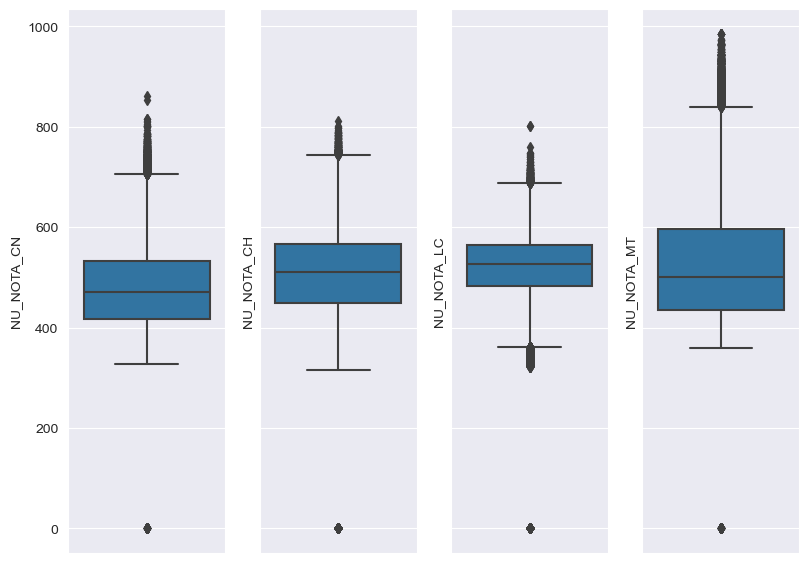

In [30]:
# Analisando as notas do Enem 2019 pelo meio de Boxplots:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas_2019[i]
    sns.boxplot(data=df_enem_2019, y=coluna_1, ax=graficos[i])

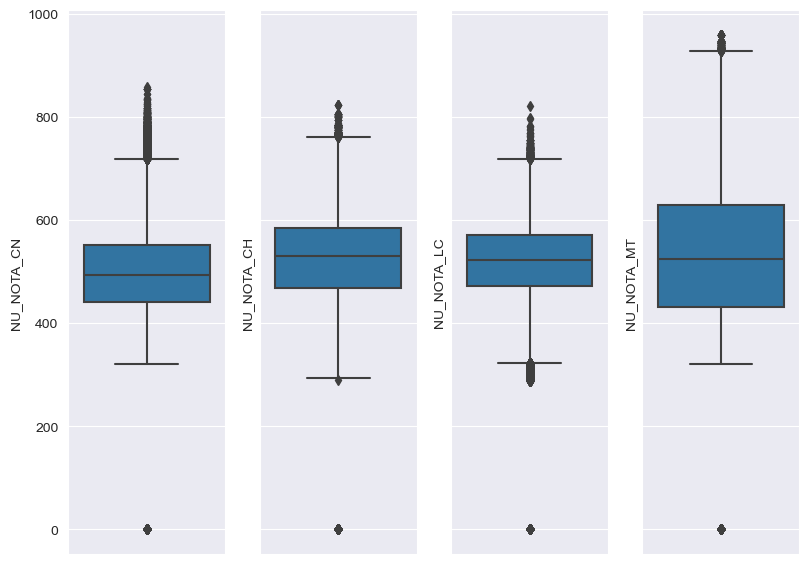

In [31]:
# Repetindo para 2023:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas_2023[i]
    sns.boxplot(data=df_enem_2023, y=coluna_1, ax=graficos[i])

# <a>Análise das Notas:</a>

1 - O desempenho em Ciências Naturais foi relativamente parecido em 2019 e 2023, ficando entre 600 e 400, porém com um leve desempenho superior em 2023 visto que o primeiro quartil ficou mais afastado do 400, indicando desempenho levemente superior

2 - Novamente um desempenho levemente superior em Ciências Humanas em 2023, porém sem uma grande descrepância. O mesmo com Linguagens e Códigos e Matemática

3 - Percebe-se outliers superiores em todas as provas (notas muito acima da média), porém abaixo só tinhamos em Linguagens em 2019, e temos em Linguagens e Ciências Humanas em 2023 (talvez porque o desempenho geral tenha sido levemente superior)

4 - Tivemos bem menos outliers superiores em Matemática em 2023 do que em 2019, e em ambas as provas ele apresenta o maior boxplot (o que indica que é a prova onde existe mais discrepância entre as notas)

5 - Existem outliers com valor 0, são os alunos que provavelmente perderam um dos dias de prova

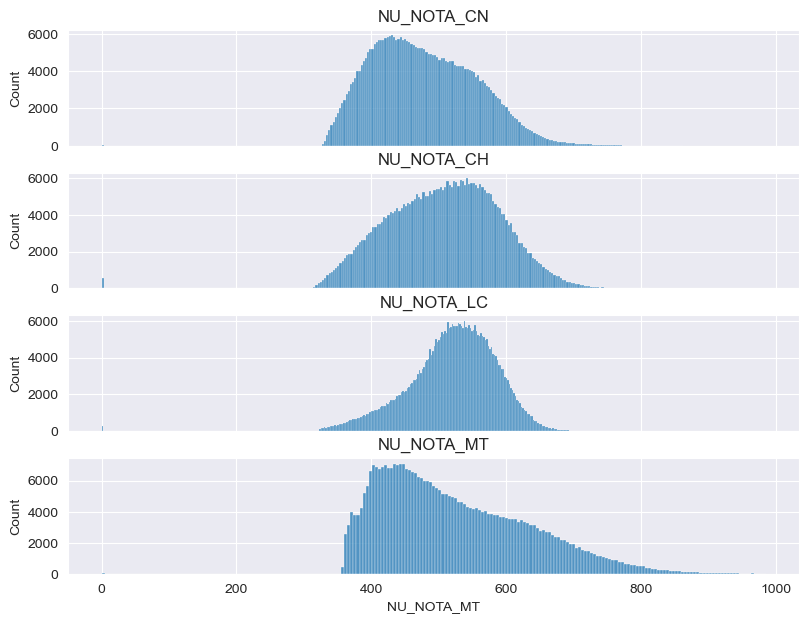

In [45]:
# Analisando a Distribuição das notas do Enem 2019:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas_2019[i]
    sns.histplot(data=df_enem_2019[coluna_1], ax=graficos[i]).set_title(coluna_1)

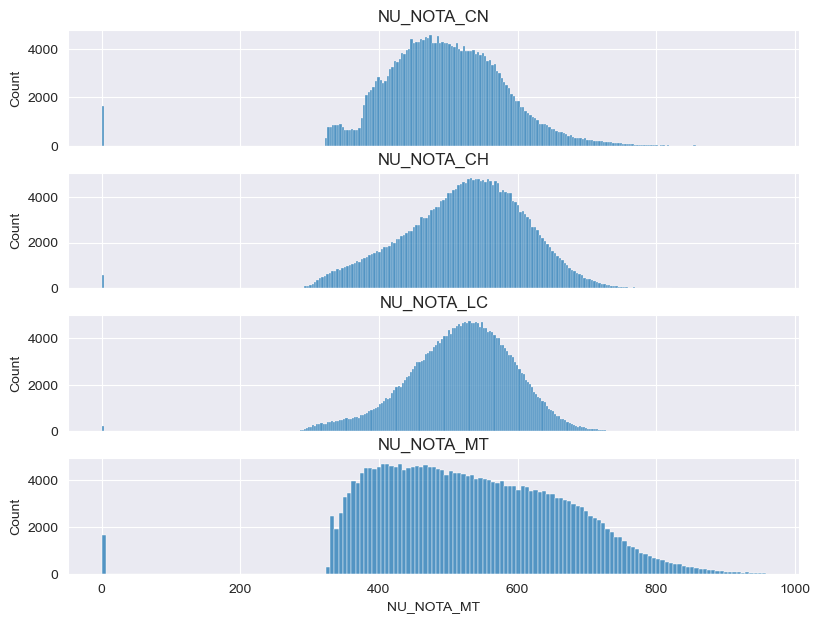

In [46]:
# Analisando a Distribuição das notas do Enem 2023:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas_2023[i]
    sns.histplot(data=df_enem_2023[coluna_1], ax=graficos[i]).set_title(coluna_1)

# <a>Análise das Dispersões</a>

1 - As notas de Ciências Naturais, Linguagens e Códigos e Matemática seguiram o mesmo comportamento em 2019 e 2023, ainda que com algumas alterações:
    1.1 - Tivemos desempenhos melhores em Matemática em 2023
    1.2 - A cauda continua em Matemática, porém com contagem maior

2 - A distribuição em Ciências Humanas foi a única que mudou bastante seu comportamento (tivemos um desempenho levemente superior dos alunos de 2023 em todas)

3 - Os outliers zerados foram superiores em 2023, aparecendo com mais destaque nas dispersões

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

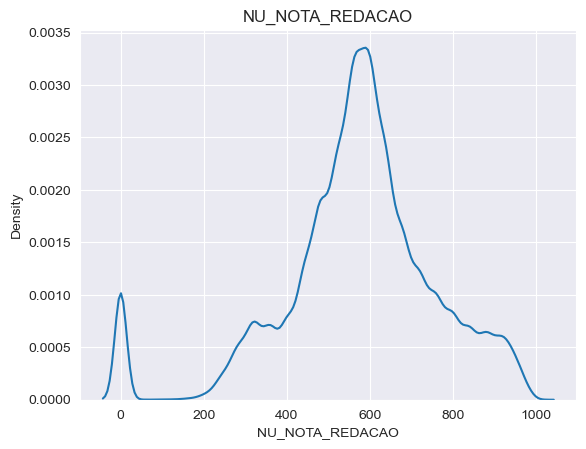

In [49]:
# Analisando as notas de redação em 2019:

sns.kdeplot(data=df_enem_2019['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

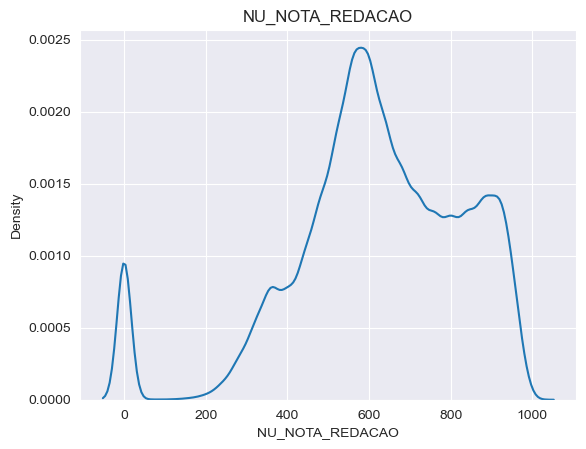

In [50]:
# Analisando as notas de redação em 2023:

sns.kdeplot(data=df_enem_2023['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

# <a>Analise da Nota de Redação</a>

Percebe-se claramente um melhor desempenho dos alunos de 2023, ainda que a maioria dos alunos tenha ficado no mesmo "intervalo" de notas (pico próximo da nota 600, ou seja, muitos alunos tiveram esse desempenho). Porém tivemos mais alunos com desempenho acima de 600 em 2023 do que em 2019.

# <a>Analisando as Informações Demográficas</a>

Vamos agora observar as informações demográficas dos candidados do Enem 2019 e comparar com os do Enem 2023

In [52]:
df_enem_2019.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [53]:
# Vamos colocar indices ordinais:

df_enem_2019 = df_enem_2019.reset_index(drop=True)
df_enem_2019.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
2,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
3,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
4,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [55]:
df_enem_2023 = df_enem_2023.reset_index(drop=True)
df_enem_2023.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,3,F,1,1,1,2,0,2,2.00,0,RJ,2.00,1.00,1.00,RJ,1,1,1,1,408.90,526.90,417.90,416.50,0,1.00,120.00,200.00,100.00,140.00,160.00,720.00,C,C,B,B,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
1,2,F,1,1,1,3,0,1,NaN,1,None,NaN,NaN,NaN,SP,1,1,1,1,499.40,535.60,549.20,570.70,1,1.00,120.00,120.00,120.00,120.00,80.00,560.00,F,F,D,B,3,D,D,C,C,B,C,B,B,B,A,B,A,B,C,A,A,D,B,C,B
2,8,M,1,2,1,1,0,1,NaN,0,None,NaN,NaN,NaN,MA,1,1,1,1,425.20,391.70,446.00,503.50,0,1.00,80.00,100.00,100.00,100.00,80.00,460.00,D,C,A,A,2,B,A,B,D,A,A,B,A,A,A,A,A,A,B,A,B,D,A,A,B
3,12,M,1,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,PE,1,1,1,1,620.80,584.40,493.00,412.70,1,1.00,120.00,180.00,160.00,160.00,200.00,820.00,B,B,A,A,4,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,B
4,2,F,1,1,1,2,0,2,1.00,0,PR,2.00,1.00,1.00,PR,1,1,1,1,445.10,458.00,457.20,491.60,1,1.00,80.00,120.00,100.00,100.00,0.00,400.00,B,B,C,B,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B


In [56]:
# Analisando a idade dos candidatos ao Enem 2019:

df_enem_2019['NU_IDADE'].value_counts().sort_index()

12.00        6
13.00       23
14.00      529
15.00     7824
16.00    31369
17.00    84619
18.00    86634
19.00    57786
20.00    41133
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
66.00       55
67.00       63
68.00       35
69.00       31
70.00       27
71.00       18
72.00       12
73.00        8
74.00       10
75.00        7
76.00        3
77.00        1
78.00     

<Axes: xlabel='NU_IDADE', ylabel='Density'>

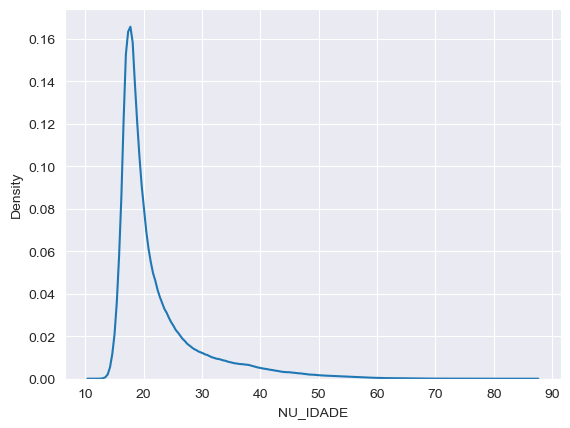

In [58]:
# Plotando um gráfico de densidade:

sns.kdeplot(data=df_enem_2019, x='NU_IDADE')

Em 2023 não existia o campo idade, mas sim faixa etária:

Faixa 1 - Menor que 17 anos </br>
Faixa 2 - 17 anos </br>
Faixa 3 - 18 anos </br>
Faixa 4 - 19 anos </br>
Faixa 5 - 20 anos </br>
Faixa 6 - 21 anos </br>
Faixa 7 - 22 anos </br>
Faixa 8 - 23 anos </br>
Faixa 9 - 24 anos </br>
Faixa 10 - 25 anos </br>
Faixa 11 - Entre 26 e 30 anos </br>
Faixa 12 - Entre 31 e 35 anos </br>
Faixa 13 - Entre 36 e 40 anos </br>
Faixa 14 - Entre 41 e 45 anos </br>
Faixa 15 - Entre 46 e 50 anos </br>
Faixa 16 - Entre 51 e 55 anos </br>
Faixa 17 - Entre 56 e 60 anos </br>
Faixa 18 - Entre 61 e 65 anos </br>
Faixa 19 - Entre 66 e 70 anos </br>
Faixa 20 - Maior que 70 anos

In [61]:
df_enem_2023['TP_FAIXA_ETARIA'].value_counts().sort_index()

1     34774
2     75049
3     90276
4     43161
5     26940
6     18308
7     13820
8     11182
9      9180
10     7373
11    24823
12    13316
13     9775
14     6732
15     4095
16     2426
17     1306
18      552
19      208
20       99
Name: TP_FAIXA_ETARIA, dtype: int64

<Axes: xlabel='TP_FAIXA_ETARIA', ylabel='Density'>

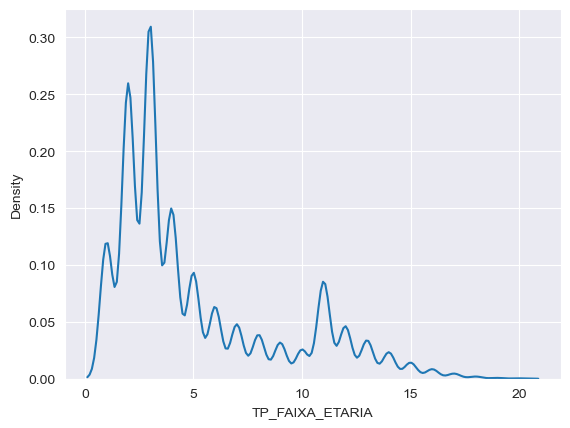

In [62]:
# Plotando um gráfico de densidade:

sns.kdeplot(data=df_enem_2023, x='TP_FAIXA_ETARIA')

# <a>Comparando as Idades</a>

Por se tratar de Faixa Etária em 2023 tivemos um gráfico com muitos "saltos". Porém a maioria esmagadora ficou entra as faixas 2 e 4 (entre 17 e 19) o que já era de se esperar. Porém, em 2023 tivemos um pico na faixa 11 e 12 (Entre 26 e 35 anos) o que é interessante, pois mostra adultos concluindo o ensino médio e prestando o exame.

Não tivemos nenhum comportamento desse tipo em 2019, existe o pico entre 16 e 18/19 anos, porém quanto mais aumentamos a idade, menos temos candidatos.

In [63]:
# Analisando o gênero:
df_enem_2019['TP_SEXO'].value_counts()

F    303139
M    206388
Name: TP_SEXO, dtype: int64

In [65]:
# Em porcentagem:
df_enem_2019['TP_SEXO'].value_counts(normalize=True)*100

F   59.49
M   40.51
Name: TP_SEXO, dtype: float64

In [66]:
# Verificando a porcentagem em 2023:
df_enem_2023['TP_SEXO'].value_counts(normalize=True)*100

F   61.18
M   38.82
Name: TP_SEXO, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

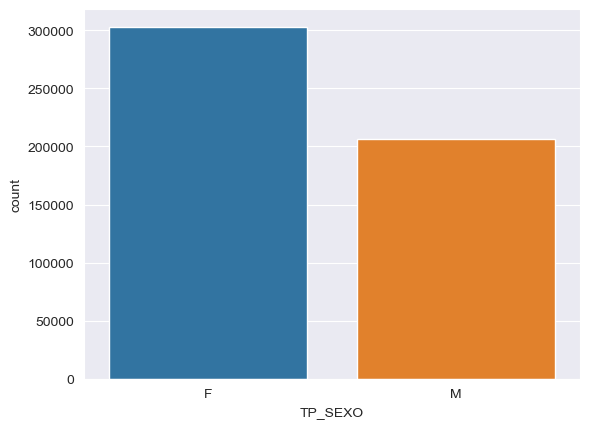

In [67]:
# Plotando gráficos de contagem:
sns.countplot(data=df_enem_2019, x='TP_SEXO')

<Axes: xlabel='TP_SEXO', ylabel='count'>

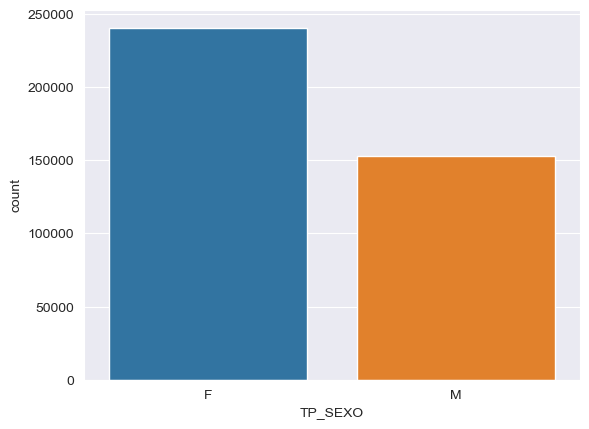

In [68]:
sns.countplot(data=df_enem_2023, x='TP_SEXO')

# <a>Comparando os gêneros</a>

Tanto em 2019 quanto em 2023 nós tivemos mais mulheres prestando o Enem. Em 2019 a porcentagem foi de 59.49% e em 2023 ela subiu para 61.18%

In [73]:
# Analisando o estado civil dos candidatos:
# 0 - Não informado
# 1 - Solteiro(a)
# 2 - Casado / Mora com parceiro(a)
# 3 - Divorciado(a) / Desquitado(a) / Separado(a)
# 4 - Viúvo(a)

df_enem_2019['TP_ESTADO_CIVIL'].value_counts().sort_index()

0     20345
1    439950
2     39834
3      8763
4       635
Name: TP_ESTADO_CIVIL, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

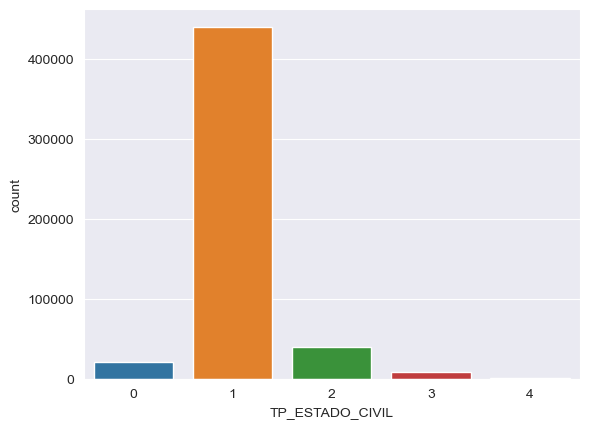

In [70]:
sns.countplot(data=df_enem_2019, x='TP_ESTADO_CIVIL')

In [71]:
df_enem_2023['TP_ESTADO_CIVIL'].value_counts().sort_index()

0     17258
1    349107
2     19960
3      6598
4       472
Name: TP_ESTADO_CIVIL, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

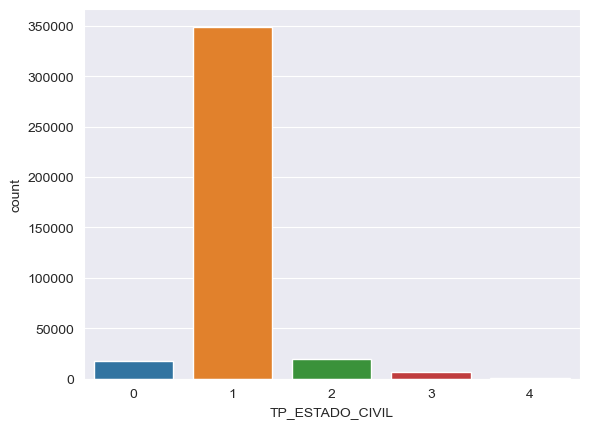

In [72]:
sns.countplot(data=df_enem_2023, x='TP_ESTADO_CIVIL')

# <a>Comparando o Estado Civil</a>

Em todos, a maioria esmagadora dos candidatos é SOLTEIRO(A), o que já era esperado se tratando de jovens ainda no Ensino Médio.